In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras

In [2]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

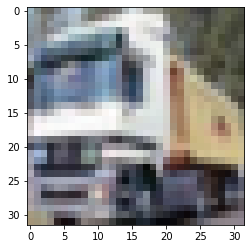

In [3]:
plt.imshow(xtrain[1])

In [8]:
ytrain=ytrain.reshape(-1)

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

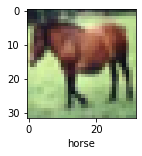

In [14]:
plot_sample(xtrain,ytrain,7)                                    #example

In [17]:
xtrain.shape

(50000, 32, 32, 3)

In [15]:
xtrain=xtrain/255
xtest=xtest/255

In [22]:
model= keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=10,batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 46s 9ms/step - loss: 1.4403 - accuracy: 0.4899
Epoch 2/10
5000/5000 [==============================] - 46s 9ms/step - loss: 1.1789 - accuracy: 0.5847
Epoch 3/10
5000/5000 [==============================] - 48s 10ms/step - loss: 1.0597 - accuracy: 0.6276
Epoch 4/10
5000/5000 [==============================] - 48s 10ms/step - loss: 0.9653 - accuracy: 0.6624
Epoch 5/10
5000/5000 [==============================] - 48s 10ms/step - loss: 0.8992 - accuracy: 0.6829
Epoch 6/10
5000/5000 [==============================] - 48s 10ms/step - loss: 0.8355 - accuracy: 0.7053
Epoch 7/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.7764 - accuracy: 0.7277
Epoch 8/10
5000/5000 [==============================] - 45s 9ms/step - loss: 0.7289 - accuracy: 0.7424
Epoch 9/10
5000/5000 [==============================] - 47s 9ms/step - loss: 0.6789 - accuracy: 0.7604
Epoch 10/10
5000/5000 [==============================] - 48s 10ms/ste

In [23]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 1.2261 - accuracy: 0.6202


[1.2260998487472534, 0.620199978351593]

In [24]:
ytest=ytest.reshape(-1,)
ypred=model.predict(xtest)

313/313 [==============================] - 2s 7ms/step


In [28]:
ypred=[np.argmax(element) for element in ypred]
ypred[:5]

[3, 8, 8, 0, 4]

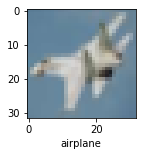

In [31]:
plot_sample(xtest,ypred,10)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1000
           1       0.82      0.59      0.69      1000
           2       0.59      0.38      0.46      1000
           3       0.44      0.48      0.46      1000
           4       0.57      0.54      0.55      1000
           5       0.50      0.59      0.54      1000
           6       0.77      0.61      0.68      1000
           7       0.67      0.70      0.69      1000
           8       0.76      0.76      0.76      1000
           9       0.60      0.81      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

